#### Dataset

In [1]:
# Dataset: UpdatedResumeDataset.csv
# Location: https://mitu.co.in/dataset

#### Load libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/home/mitu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


#### Read the data

In [3]:
df = pd.read_csv('/home/mitu/datasets/UpdatedResumeDataSet.csv')

In [4]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


#### Separate the input and output data

In [5]:
x = df['Resume']
y = df['Category']

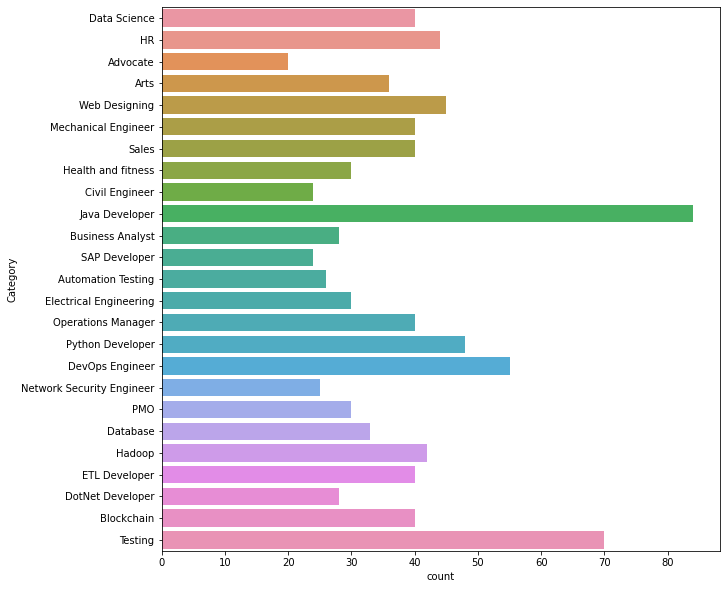

In [6]:
plt.figure(figsize=(10,10))
sns.countplot(y=y);

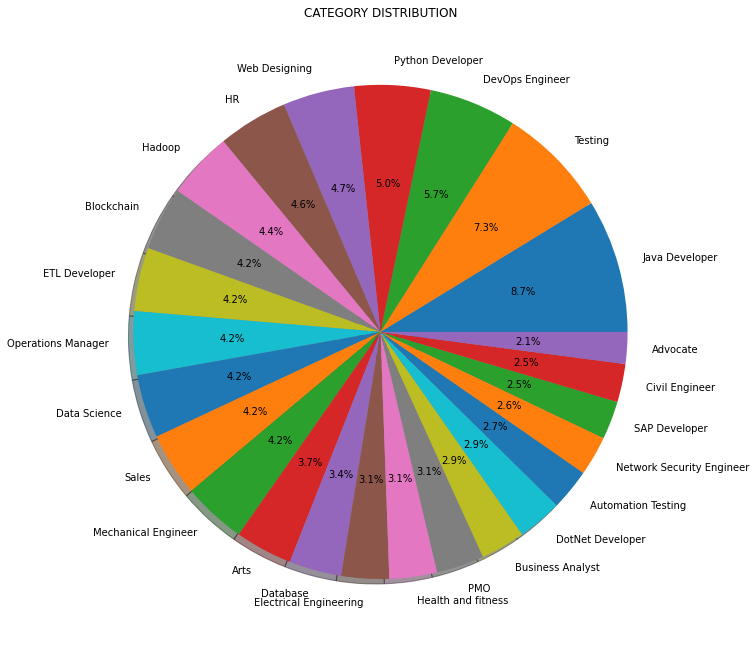

In [7]:
from matplotlib.gridspec import GridSpec
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].value_counts().index
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 1], aspect=1, 
            title='CATEGORY DISTRIBUTION')

plt.pie(targetCounts, labels=targetLabels, 
                     autopct='%1.1f%%', shadow=True);

In [8]:
import re

In [9]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', ' ', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', ' ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % 
        re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),
                        ' ',resumeText)  
    # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  
    # remove extra whitespace
    return resumeText

In [10]:
cleanResume(df['Resume'][17])

'Education Details B Tech Rayat and Bahra Institute of Engineering and Biotechnology Data Science Data Science Skill Details Numpy Exprience Less than 1 year months Machine Learning Exprience Less than 1 year months Tensorflow Exprience Less than 1 year months Scikit Exprience Less than 1 year months Python Exprience Less than 1 year months GCP Exprience Less than 1 year months Pandas Exprience Less than 1 year months Neural Network Exprience Less than 1 year monthsCompany Details company Wipro description Bhawana Aggarwal E Mail bhawana chd Phone 09876971076 VVersatile high energy professional targeting challenging assignments in Machine PROFILE SUMMARY An IT professional with knowledge and experience of 2 years in Wipro Technologies in Machine Learning Deep Learning Data Science Python Software Development Skilled in managing end to end development and software products projects from inception requirement specs planning designing implementation configuration and documentation Knowled

In [11]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.13.1-unknown has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that t

In [12]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [20]:
swords = stopwords.words('english')
totalWords =[]
Sentences = df['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word.lower() not in swords:
            totalWords.append(word.lower())

In [21]:
len(totalWords)

33270

In [22]:
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('details', 488), ('exprience', 446), ('data', 416), ('company', 398), ('months', 394), ('description', 358), ('1', 290), ('project', 254), ('year', 252), ('january', 216), ('learning', 210), ('science', 208), ('less', 204), ('skill', 190), ('python', 176), ('maharashtra', 166), ('6', 164), ('machine', 156), ('education', 146), ('college', 146), ('arts', 144), ('university', 140), ('skills', 134), ('development', 134), ('web', 134), ('like', 126), ('analytics', 120), ('india', 120), ('management', 120), ('application', 120), ('team', 116), ('software', 116), ('using', 110), ('business', 108), ('sql', 104), ('developed', 104), ('monthscompany', 102), ('time', 100), ('used', 98), ('b', 98), ('c', 98), ('experience', 96), ('mumbai', 96), ('projects', 94), ('knowledge', 94), ('analysis', 92), ('technologies', 92), ('hr', 92), ('engineering', 90), ('pune', 90)]


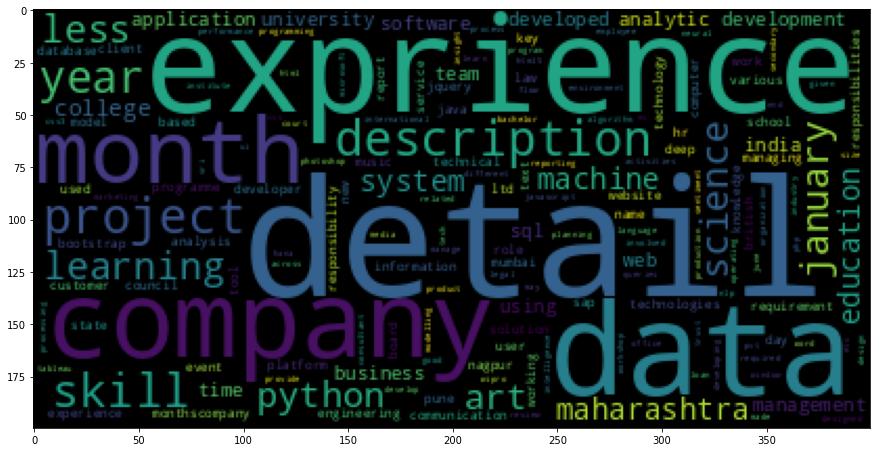

In [23]:
wc1 = WordCloud(collocations=False).generate(" ".join(totalWords))
plt.figure(figsize=(15,15))
plt.imshow(wc1)
plt.savefig('wordcloud.jpg')

In [24]:
x = df['Resume']
y = df['Category']

#### TF*IDF Vectorizer

In [26]:
cleaned = x.apply(lambda a: cleanResume(a))

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfidf = TfidfVectorizer()

In [29]:
x_vect = tfidf.fit_transform(cleaned)

In [30]:
x_vect.shape

(962, 7566)

#### Cross-validation

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_vect, y, random_state=0, stratify=y)

In [35]:
x_train.shape, x_test.shape

((721, 7566), (241, 7566))

#### Build the model

In [37]:
from sklearn.neighbors import NearestCentroid

In [38]:
clf = NearestCentroid()

In [39]:
clf.fit(x_train, y_train)

NearestCentroid()

#### Performance Evaluation

In [41]:
y_pred = clf.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score, classification_report

In [43]:
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         5
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      1.00      1.00         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       1.00      0.90      0.95        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         7
            ETL Developer       1.00      1.00      1.00        10
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1.00      1.00     

In [44]:
accuracy_score(y_test, y_pred)

0.991701244813278

In [47]:
f = open('/home/mitu/datasets/Sample_resume.txt')
new = f.read()
new = cleanResume(new)
new = tfidf.transform([new])
clf.predict(new)

array(['Data Science'], dtype=object)